# Project Journal

Name: Erin Widener

Research Question: In considering 3 different energy production sources (total fossil fuel production, nuclear electric power production, total renewable energy production) and 1 energy import variable (primary energy imports), can at least one of these sources of energy "inputs" accurately predict total primary energy consumption?  

Variables: Response = Total Primary Energy Consumption (Y)
           Predictor(s) = Total Fossil Fuel Production (B1, X1), Nuclear Electric Power Production (B2, X2), Total Renewable Energy Production (B3, X3), Primary Energy Imputs (B4, X4)

Hypothesis: Is there at least one predictor useful in predicting total primary energy consumption? 

Ho: B1 = B2 = B3 = B4 = 0 
Ha: At least one Bj ≠ 0 (j= 1-4) 

## Data Prep & EDA

### Data Cleaning Summary

**Summary of data cleaning process:**
1. Step 1: Set wd and install/load packages
2. Step 2: Import data
3. Step 3: Asses the structure of the data
4. Step 4: Build dataframe with relevant variables

**Issues Encountered and Resolutions:**
Some minor loading issues with some packages (ALSM) and extracting relevant variables from dataset renaming them to analysis friendly terms like "Fossil" or "Renewable"


In [5]:
# install.packages("vroom")
# install.packages("tidyverse")
# install.packages("IRkernel")
# install.packages("car")
# install.packages("fmsb")
# install.packages("GGally")
# install.packages("lmridge")
# install.packages("lmtest")
# install.packages("MASS")
# install.packages("glmnet") 
# install.packages("boot") 
# install.packages("caret")

In [ ]:
# Step 1: Set working directory
cat("Please enter the path to set as the working directory (leave blank to use the current directory): ")
working_dir <- readline()

if (working_dir != "") {
  setwd(working_dir)
  cat("Working directory set to:", getwd(), "\n")
} else {
  cat("Using current working directory:", getwd(), "\n")
}

# Step 2: Download the ALSM package
url <- "https://cran.r-project.org/src/contrib/Archive/ALSM/ALSM_0.2.0.tar.gz"
destfile <- file.path(getwd(), "ALSM_0.2.0.tar.gz")
download.file(url, destfile = destfile)

# Step 3: Install ALSM package
tryCatch({
  install.packages(destfile, repos = NULL, type = "source", lib = .libPaths()[1])
  cat("ALSM package installed successfully!\n")
}, error = function(e) {
  cat("Error during ALSM installation:", e$message, "\n")
})

# Step 4: Install dependencies
install.packages(c("leaps", "SuppDists"), dependencies = TRUE)

# Step 5: Load ALSM
tryCatch({
  library(ALSM)
  cat("ALSM package loaded successfully!\n")
}, error = function(e) {
  cat("Error loading ALSM:", e$message, "\n")
})

In [8]:
##Step 1 - set working directory and install/load packages (installation code deleted to show clearly the packeges loaded from library)
library(vroom)
library(tidyverse)
library(IRkernel)
library(ALSM)
library(car)
library(fmsb)
library(GGally)
library(lmridge)
library(lmtest)
library(MASS)
library(glmnet)
library(boot)
library(caret)

Warning message:
"package 'fmsb' was built under R version 4.4.2"
Warning message:
"package 'GGally' was built under R version 4.4.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'lmridge'


The following object is masked from 'package:car':

    vif


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'MASS' was built under R version 4.4.2"

Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Warning message:
"package 'glmnet' was built under R version 4.4.2"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8

Warning message:
"package 'boot' was built under R version 4.4.2"

Attaching package: 'boot'


The following object is masked from 'package:car':



In [9]:
##Step 2 - Import dataset
dataset <- read.csv("World Energy Overview.csv")
matrix.data <- as.matrix(dataset)

In [10]:
##Step 3 - Asses the structure of the data
str(dataset)
str(matrix.data)

'data.frame':	599 obs. of  13 variables:
 $ Date                                 : chr  "1973-01-31" "1973-02-28" "1973-03-31" "1973-04-30" ...
 $ Total.Fossil.Fuels.Production        : num  4.93 4.73 4.95 4.72 4.96 ...
 $ Nuclear.Electric.Power.Production    : num  0.0681 0.0646 0.0725 0.0641 0.0621 ...
 $ Total.Renewable.Energy.Production    : num  0.404 0.361 0.4 0.38 0.392 ...
 $ Total.Primary.Energy.Production      : num  5.4 5.16 5.42 5.16 5.41 ...
 $ Primary.Energy.Imports               : num  1.17 1.17 1.31 1.09 1.16 ...
 $ Primary.Energy.Exports               : num  0.126 0.121 0.14 0.194 0.197 ...
 $ Primary.Energy.Net.Imports           : num  1.047 1.047 1.17 0.891 0.966 ...
 $ Primary.Energy.Stock.Change.and.Other: num  0.7719 0.3901 -0.0676 -0.1101 -0.3053 ...
 $ Total.Fossil.Fuels.Consumption       : num  6.75 6.16 6.04 5.49 5.61 ...
 $ Nuclear.Electric.Power.Consumption   : num  0.0681 0.0646 0.0725 0.0641 0.0621 ...
 $ Total.Renewable.Energy.Consumption   : num  0.404 0

In [11]:
#Step 4 Building dataframe with relevant variables
Y <- dataset$Total.Primary.Energy.Consumption 
X1 <- dataset$Total.Fossil.Fuels.Production
X2 <- dataset$Nuclear.Electric.Power.Production
X3 <- dataset$Total.Renewable.Energy.Production 
X4 <- dataset$Primary.Energy.Imports

predictor.response.data <- data.frame("Consumption"= Y, "Fossil" = X1, 
                                                 "Nuclear" = X2, 
                                                 "Renewable" = X3, 
                                                 "Imports" = X4)
head(predictor.response.data)

,Consumption,Fossil,Nuclear,Renewable,Imports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.223873,4.932632,0.068103,0.403981,1.173080
2,6.592366,4.729582,0.064634,0.360900,1.168005
3,6.521439,4.946902,0.072494,0.400161,1.309473
4,5.941729,4.716271,0.064070,0.380470,1.085169
5,6.071940,4.956995,0.062111,0.392141,1.162804
6,5.802683,4.716096,0.073968,0.377232,1.129614


### Summary Statistics

In [12]:
#summary statistics 
mean(Y)
sd(Y)
mean(X1)
sd(X1)
mean(X2)
sd(X2)
mean(X3)
sd(X3)
mean(X4)
sd(X4)

[1] 7.441499

[1] 0.9468823

[1] 5.034634

[1] 0.6101255

[1] 0.519567

[1] 0.2026973

[1] 0.5937087

[1] 0.1933514

[1] 1.873459

[1] 0.5612864

### Exploratory Data Analysis Findings

The main finding of this analysis was that the scale of each variable is quite different. This may make remedial measures such as log transformations have a risk of overfitting or showing as more powerful than they really are. The main thing I will be looking for are if the relationship of each predictor in the model in relation to the response variable are preserved and how these relationships explain whether or not they can be considered a useful predictor for overall energy consumption. 

***
## Model Building

### Model Equation

**Equation:** 

$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \epsilon   

Where, 
Y= Total.Primary.Energy.Consumption → Y 
    B1= Total.Fossil.Fuel.Production → X1 
    B2= Nuclear.Electric.Power.Production → X2 
    B3= Total.Renewable.Energy.Production → X3
    B4= Primary.Energy.Imports → X4

### Model Fitting

In [13]:
##MLR model
mlr.mod <- lm(Consumption ~ Fossil + Nuclear + Renewable + Imports, predictor.response.data)

### Multicollinearity

[1] 3.978349

[1] 4.954369

[1] 5.30387

[1] 3.37319

[1] 3.627209

[1] 2.543745

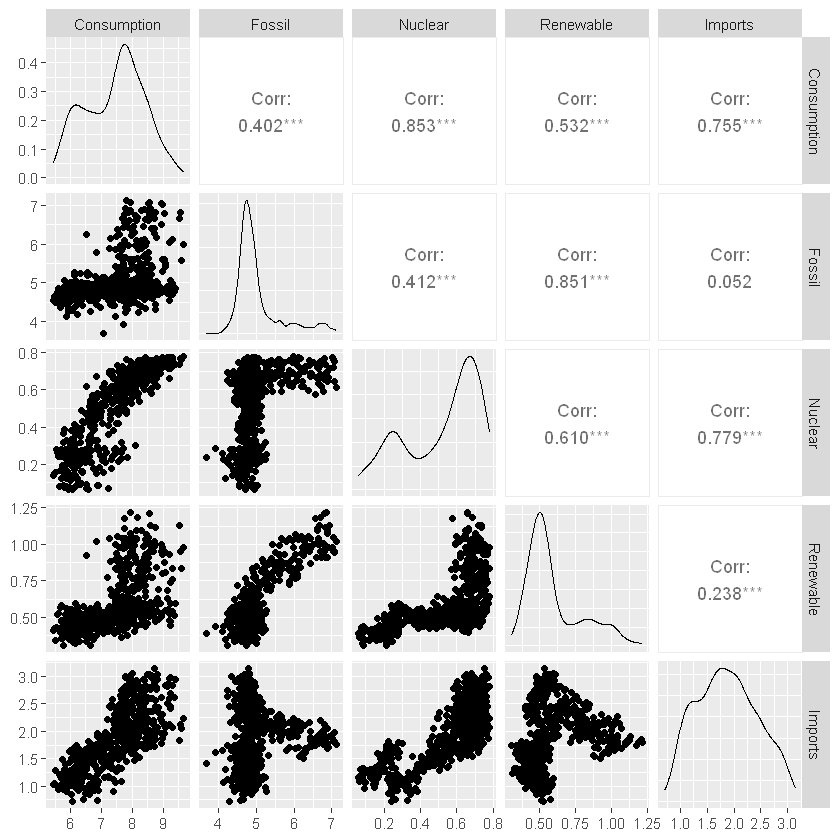

In [14]:
#Pairwise scatter plot & multicolinearity
ggpairs(predictor.response.data)
VIF(lm(Fossil ~ Nuclear + Renewable + Imports, data= predictor.response.data))
VIF(lm(Nuclear ~ Fossil + Renewable + Imports, data= predictor.response.data))
VIF(lm(Renewable ~ Fossil + Nuclear + Imports, data= predictor.response.data))
VIF(lm(Imports ~ Fossil + Nuclear + Renewable, data= predictor.response.data))
VIF(lm(Fossil ~ Renewable, data= predictor.response.data))
VIF(lm(Nuclear ~ Imports, data= predictor.response.data))

### Model Summary and Diagonostics


Call:
lm(formula = Consumption ~ Fossil + Nuclear + Renewable + Imports, 
    data = predictor.response.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2662 -0.3448 -0.1137  0.2824  1.3804 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.57696    0.24217  14.770  < 2e-16 ***
Fossil       0.32643    0.06116   5.338 1.34e-07 ***
Nuclear      2.47493    0.20543  12.048  < 2e-16 ***
Renewable   -0.25670    0.22282  -1.152     0.25    
Imports      0.58053    0.06121   9.484  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4575 on 594 degrees of freedom
Multiple R-squared:  0.7681,	Adjusted R-squared:  0.7666 
F-statistic:   492 on 4 and 594 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),3.1013379,4.0525784
Fossil,0.2063209,0.4465405
Nuclear,2.0714786,2.8783836
Renewable,-0.6943199,0.1809165
Imports,0.4603067,0.7007497


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Fossil,1,86.461412,86.4614120,413.139313,4.020660e-70
Nuclear,1,304.849344,304.8493440,1456.664258,5.898264e-162
Renewable,1,1.713483,1.7134835,8.187553,4.366369e-03
Imports,1,18.822441,18.8224411,89.939433,5.821638e-20
Residuals,594,124.311769,0.2092791,NA,NA


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Fossil,5.962366,1,28.490026,1.342094e-07
Nuclear,30.376308,1,145.147374,4.643528e-30
Renewable,0.277754,1,1.327194,2.497684e-01
Imports,18.822441,1,89.939433,5.821638e-20
Residuals,124.311769,594,NA,NA


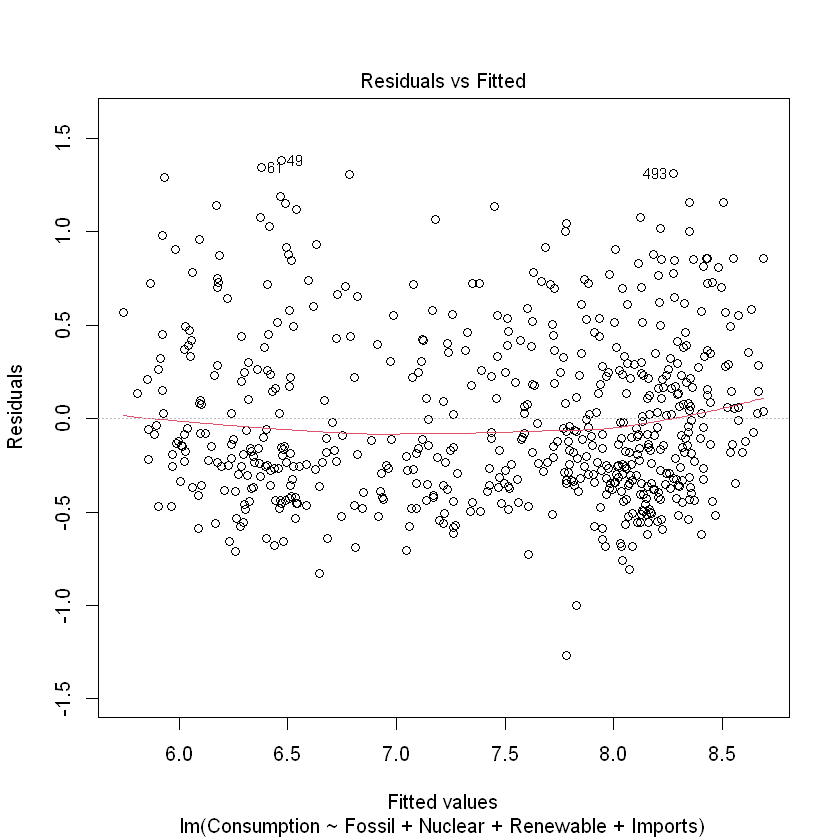

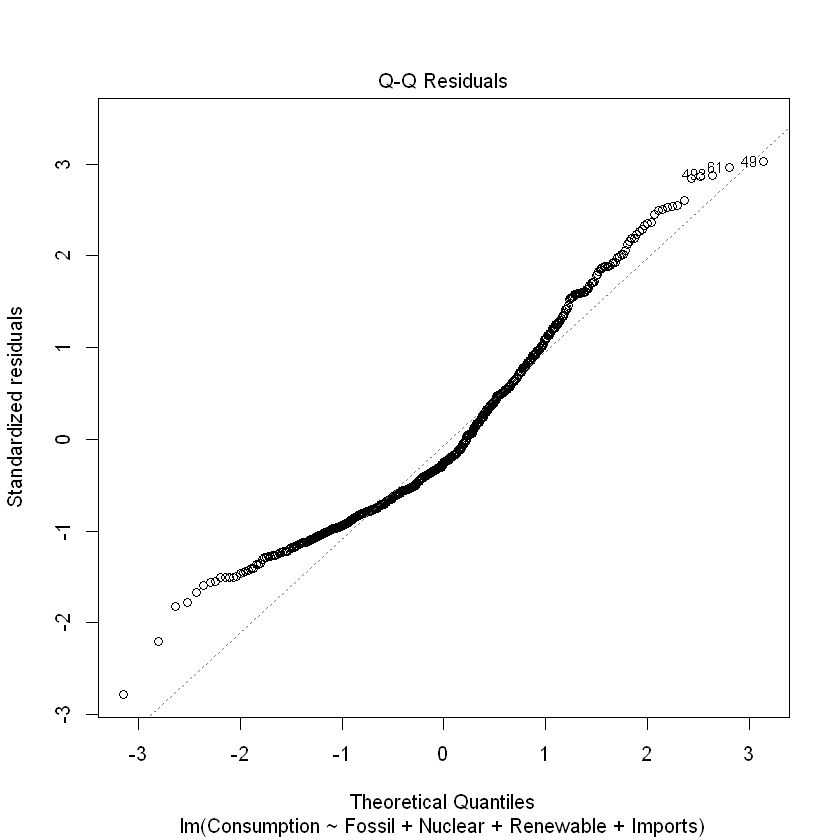

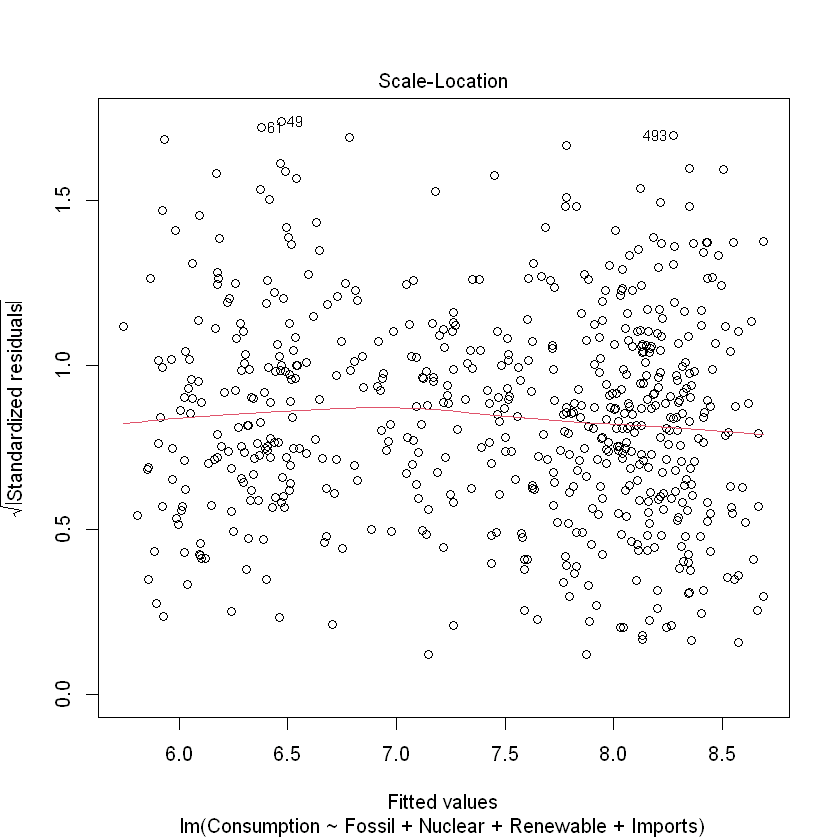

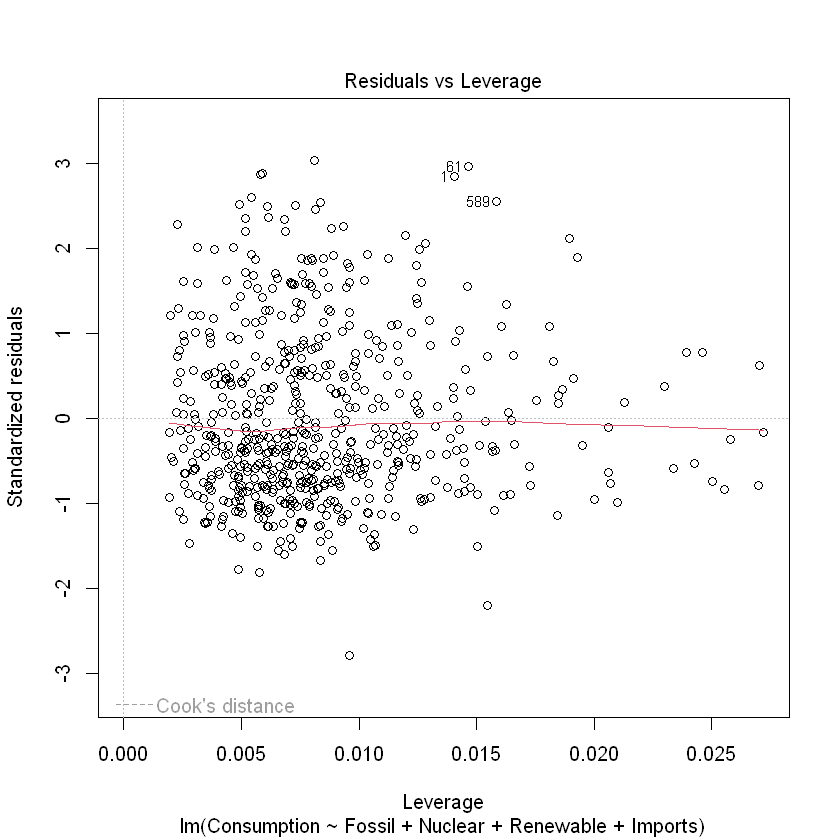

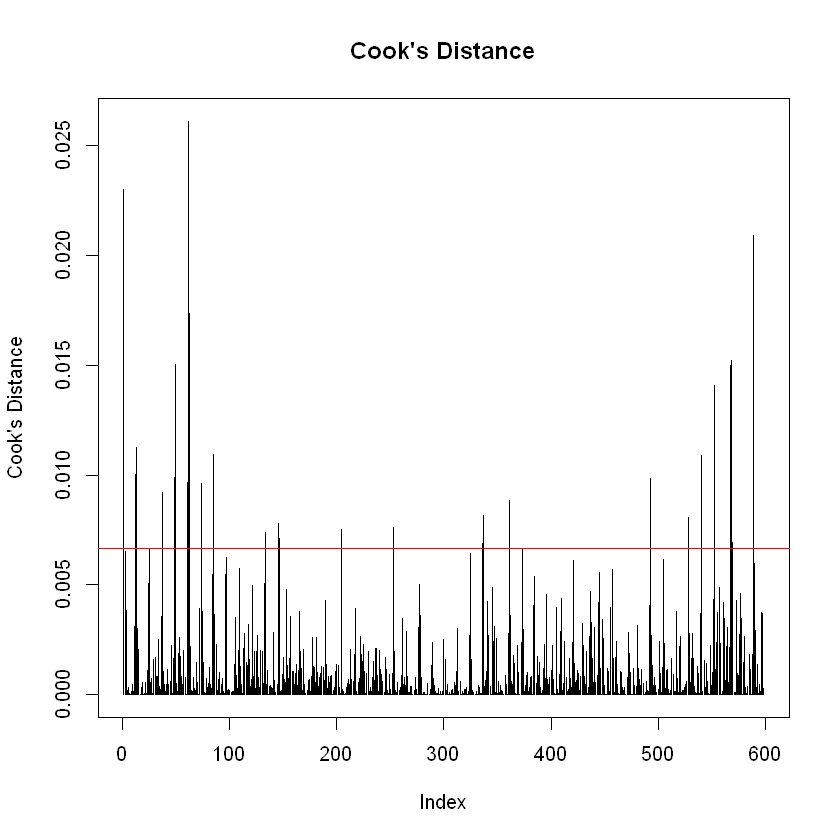

In [15]:
# Summary & confidence intervals
summary(mlr.mod)
confint(mlr.mod, level=0.95)

#Anova (type I & II)
anova(mlr.mod)
Anova(mlr.mod, type = 2)

# Diagnostics: Residual Plots, Normality, etc.
plot(mlr.mod)

#Cooks distance 
cooksd <- cooks.distance(mlr.mod)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points


Call:
lm(formula = Consumption ~ Fossil, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72818 -0.69950  0.04259  0.61808  2.07789 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.30381    0.29501   14.59   <2e-16 ***
Fossil       0.62322    0.05817   10.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8679 on 597 degrees of freedom
Multiple R-squared:  0.1613,	Adjusted R-squared:  0.1599 
F-statistic: 114.8 on 1 and 597 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = Consumption ~ Nuclear, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31748 -0.35519 -0.04741  0.31402  1.58028 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.37239    0.05573   96.40   <2e-16 ***
Nuclear      3.98238    0.09994   39.85   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4954 on 597 degrees of freedom
Multiple R-squared:  0.7268,	Adjusted R-squared:  0.7263 
F-statistic:  1588 on 1 and 597 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


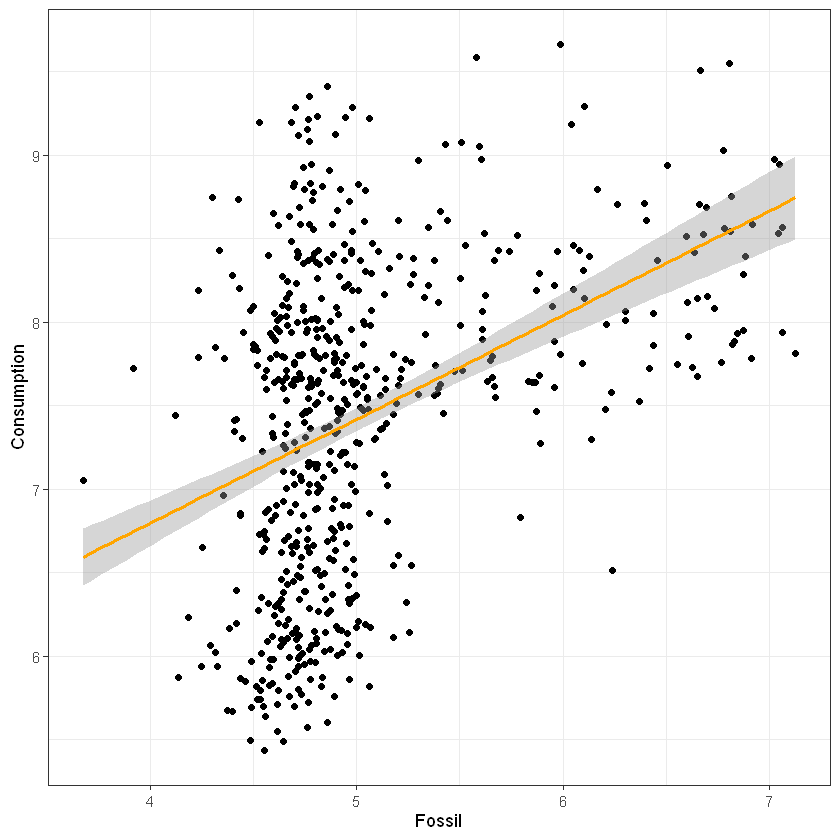


Call:
lm(formula = Consumption ~ Renewable, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78244 -0.61359 -0.06061  0.56825  2.17475 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.8957     0.1060   55.63   <2e-16 ***
Renewable     2.6036     0.1698   15.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8027 on 597 degrees of freedom
Multiple R-squared:  0.2826,	Adjusted R-squared:  0.2814 
F-statistic: 235.2 on 1 and 597 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


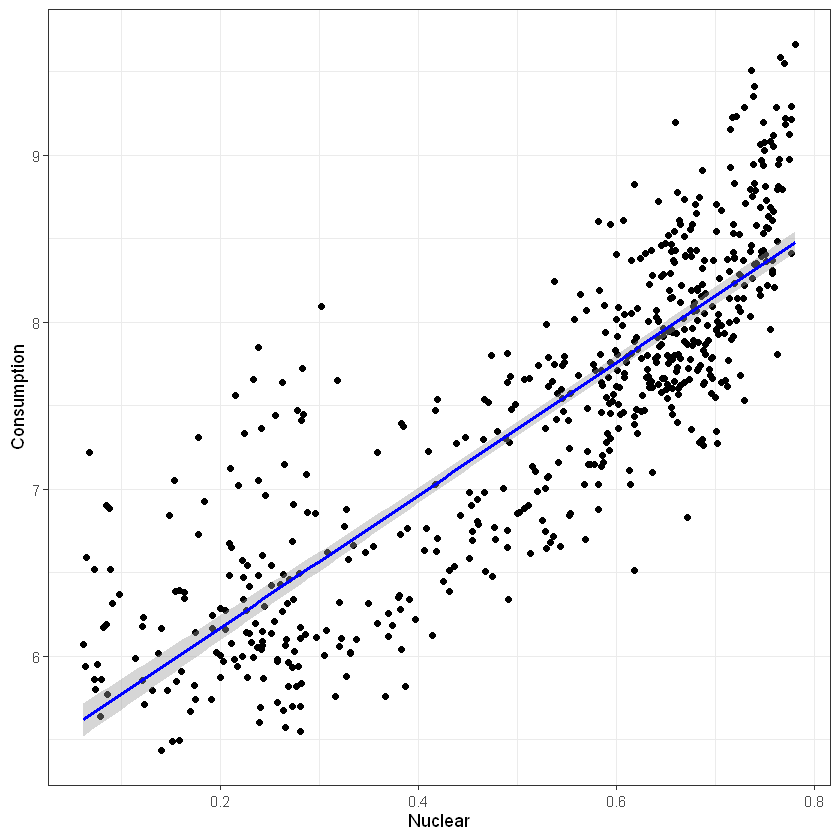


Call:
lm(formula = Consumption ~ Imports, data = predictor.response.data)

Residuals:
   Min     1Q Median     3Q    Max 
-1.197 -0.477 -0.114  0.451  2.114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.05463    0.08850   57.11   <2e-16 ***
Imports      1.27405    0.04526   28.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6212 on 597 degrees of freedom
Multiple R-squared:  0.5704,	Adjusted R-squared:  0.5696 
F-statistic: 792.5 on 1 and 597 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


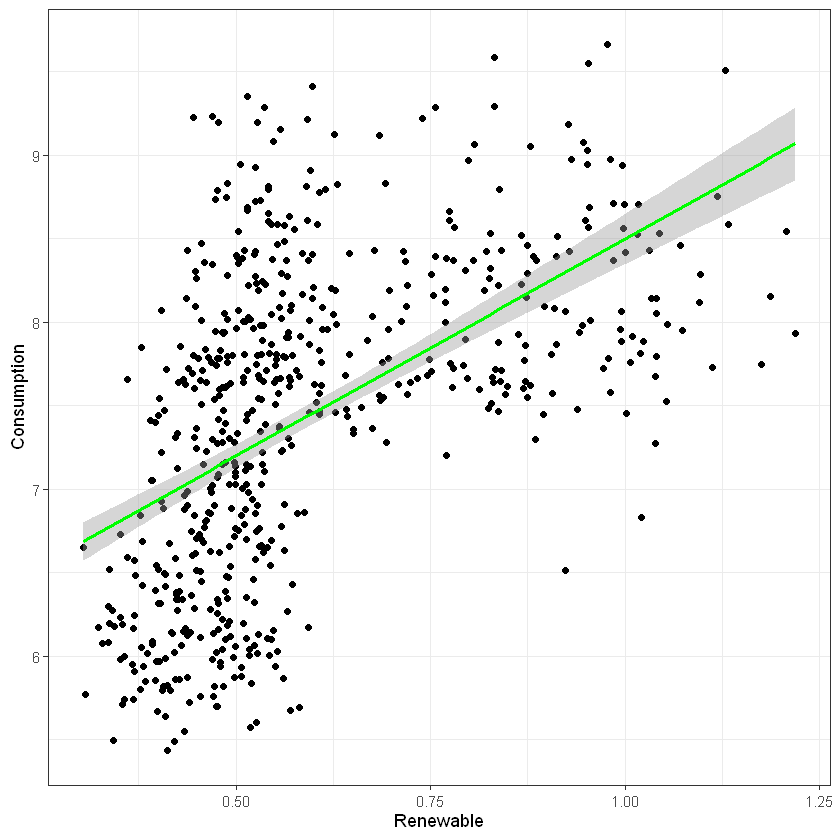

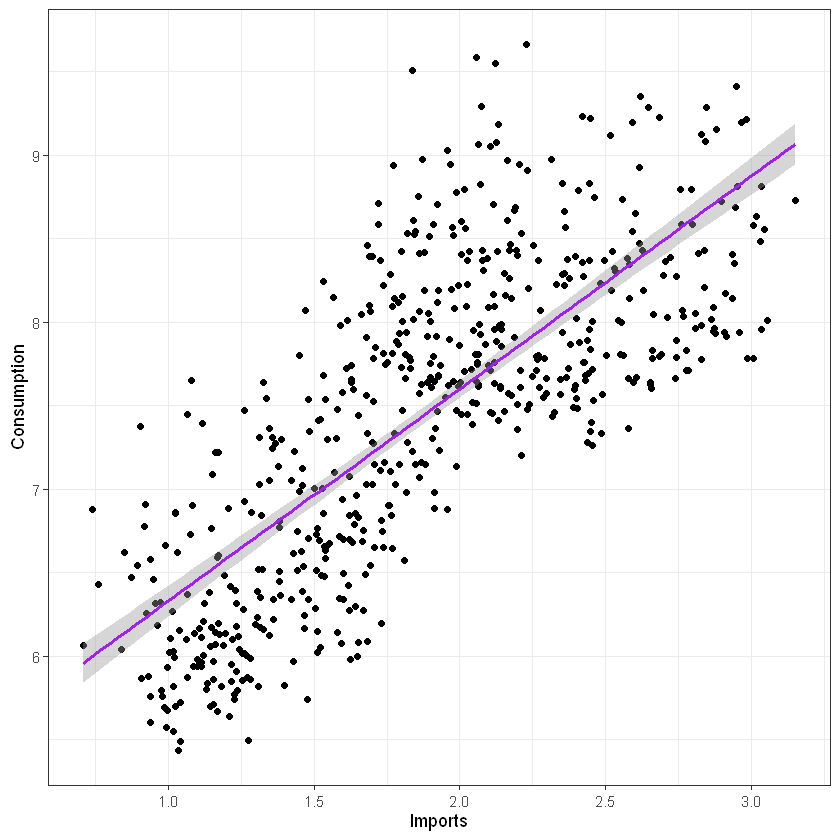

In [16]:
##Individual SLR models
#Fossil
fossil.mod <- lm(Consumption ~ Fossil, predictor.response.data)
summary(fossil.mod)
ggplot(predictor.response.data, aes(x= Fossil, y= Consumption)) +
  geom_point() + 
  geom_smooth(method = "lm", color = "orange") + 
  theme_bw()

#Nuclear
nuclear.mod <- lm(Consumption ~ Nuclear, predictor.response.data)
summary(nuclear.mod)
ggplot(predictor.response.data, aes(x= Nuclear, y= Consumption)) +
  geom_point() + 
  geom_smooth(method = "lm", color = "blue") + 
  theme_bw()

#Renewable
renewable.mod <- lm(Consumption ~ Renewable, predictor.response.data)
summary(renewable.mod)
ggplot(predictor.response.data, aes(x= Renewable, y= Consumption)) +
  geom_point() + 
  geom_smooth(method = "lm", color = "green") + 
  theme_bw()

#Imports
imports.mod <- lm(Consumption ~ Imports, predictor.response.data)
summary(imports.mod)
ggplot(predictor.response.data, aes(x= Imports, y= Consumption)) +
  geom_point() + 
  geom_smooth(method = "lm", color = "purple") + 
  theme_bw()

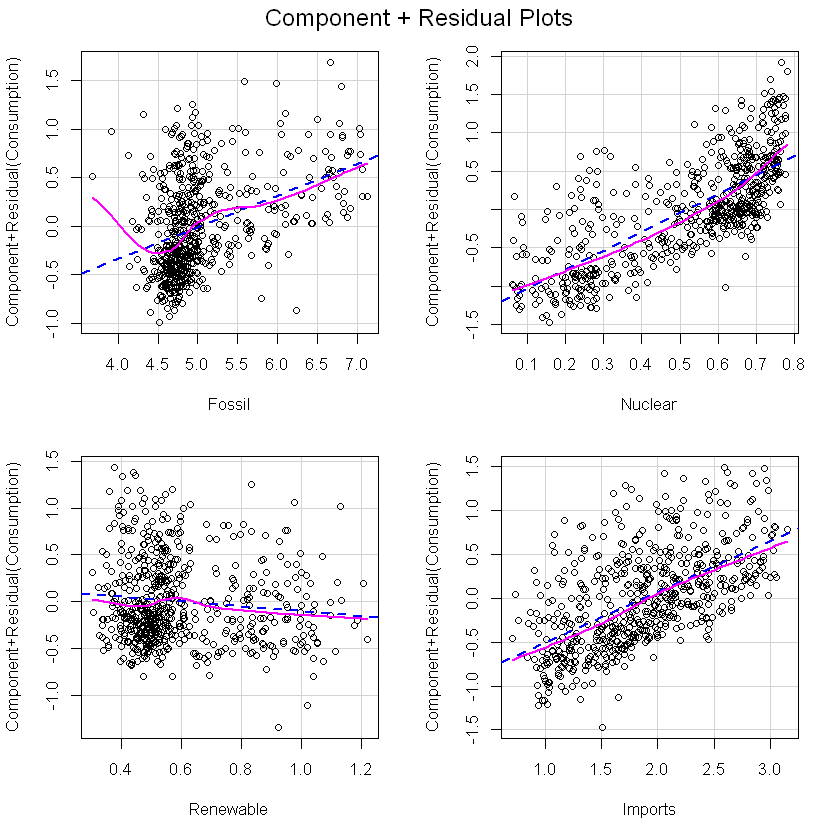

In [17]:
#Partial regression plots (component + residual) 
crPlots(mlr.mod)

***
## Model Evaluation & Validation

### Documentation of Model Adjustments

In [18]:
##MLR model effects on renewables (the problem child)
fossil.renew <- lm(Consumption ~ Fossil + Renewable, predictor.response.data)
summary(fossil.renew)
confint(fossil.renew)
Anova(fossil.renew, type= 2)

nuclear.renew <- lm(Consumption ~ Nuclear + Renewable, predictor.response.data)
summary(nuclear.renew)
confint(nuclear.renew)
Anova(nuclear.renew, type= 2)

imports.renew <- lm(Consumption ~ Imports + Renewable, predictor.response.data)
summary(imports.renew)
confint(nuclear.renew)
Anova(imports.renew, type= 2)


Call:
lm(formula = Consumption ~ Fossil + Renewable, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87204 -0.57915 -0.03385  0.54381  2.26410 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.8812     0.3660  18.803  < 2e-16 ***
Fossil       -0.2865     0.1019  -2.812  0.00509 ** 
Renewable     3.3728     0.3215  10.492  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.798 on 596 degrees of freedom
Multiple R-squared:  0.292,	Adjusted R-squared:  0.2897 
F-statistic: 122.9 on 2 and 596 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),6.1624799,7.59991168
Fossil,-0.4865196,-0.08638433
Renewable,2.7415209,4.00415852


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Fossil,5.035824,1,7.907001,5.086484e-03
Renewable,70.115578,1,110.092006,9.474590e-24
Residuals,379.581460,596,NA,NA



Call:
lm(formula = Consumption ~ Nuclear + Renewable, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34214 -0.35531 -0.04321  0.30990  1.57366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.34596    0.06778  78.871   <2e-16 ***
Nuclear      3.92962    0.12618  31.144   <2e-16 ***
Renewable    0.09068    0.13228   0.686    0.493    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4956 on 596 degrees of freedom
Multiple R-squared:  0.727,	Adjusted R-squared:  0.7261 
F-statistic: 793.5 on 2 and 596 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),5.2128437,5.4790816
Nuclear,3.6818129,4.1774210
Renewable,-0.1691025,0.3504615


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Nuclear,238.2312989,1,969.9415859,3.962542e-127
Renewable,0.1154292,1,0.4699615,4.932714e-01
Residuals,146.3859847,596,NA,NA



Call:
lm(formula = Consumption ~ Imports + Renewable, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14355 -0.39145 -0.08588  0.34846  1.50159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.25045    0.08896   47.78   <2e-16 ***
Imports      1.12430    0.03886   28.93   <2e-16 ***
Renewable    1.82701    0.11281   16.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5181 on 596 degrees of freedom
Multiple R-squared:  0.7017,	Adjusted R-squared:  0.7007 
F-statistic: 700.9 on 2 and 596 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),5.2128437,5.4790816
Nuclear,3.6818129,4.1774210
Renewable,-0.1691025,0.3504615


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Imports,224.66074,1,837.0886,1.214478e-115
Renewable,70.39952,1,262.3095,3.693328e-49
Residuals,159.95655,596,NA,NA



Call:
lm(formula = log(Consumption) ~ Fossil + Nuclear + Renewable + 
    Imports, data = predictor.response.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17064 -0.04301 -0.01489  0.03819  0.19673 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.471448   0.032615  45.116  < 2e-16 ***
Fossil       0.043780   0.008236   5.315 1.51e-07 ***
Nuclear      0.350555   0.027666  12.671  < 2e-16 ***
Renewable   -0.037768   0.030009  -1.259    0.209    
Imports      0.078552   0.008244   9.529  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06161 on 594 degrees of freedom
Multiple R-squared:  0.7779,	Adjusted R-squared:  0.7764 
F-statistic: 520.2 on 4 and 594 DF,  p-value: < 2.2e-16


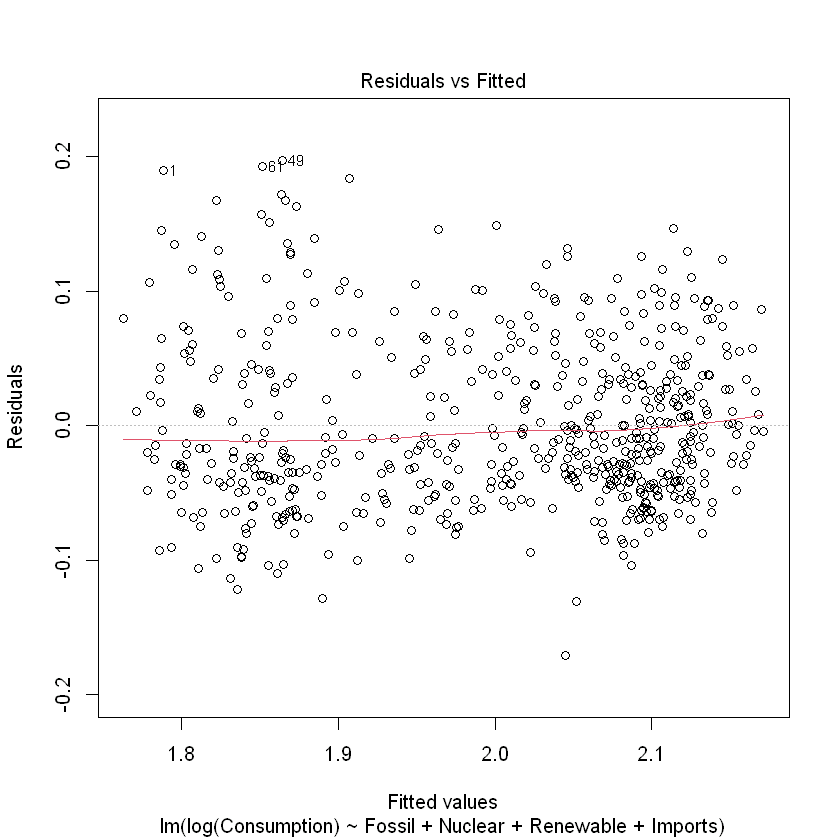

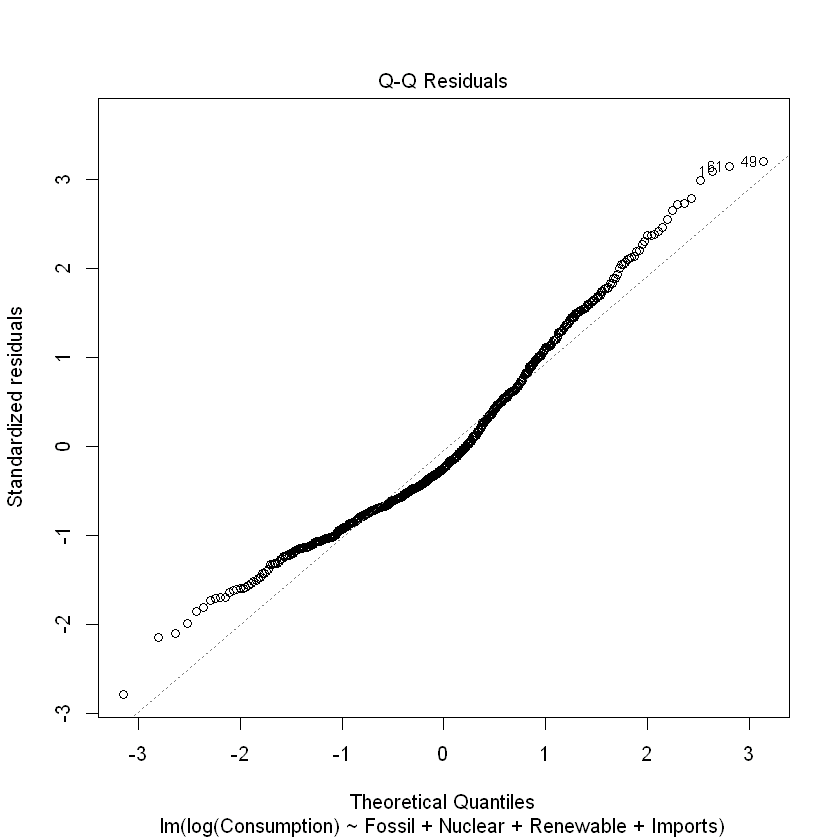

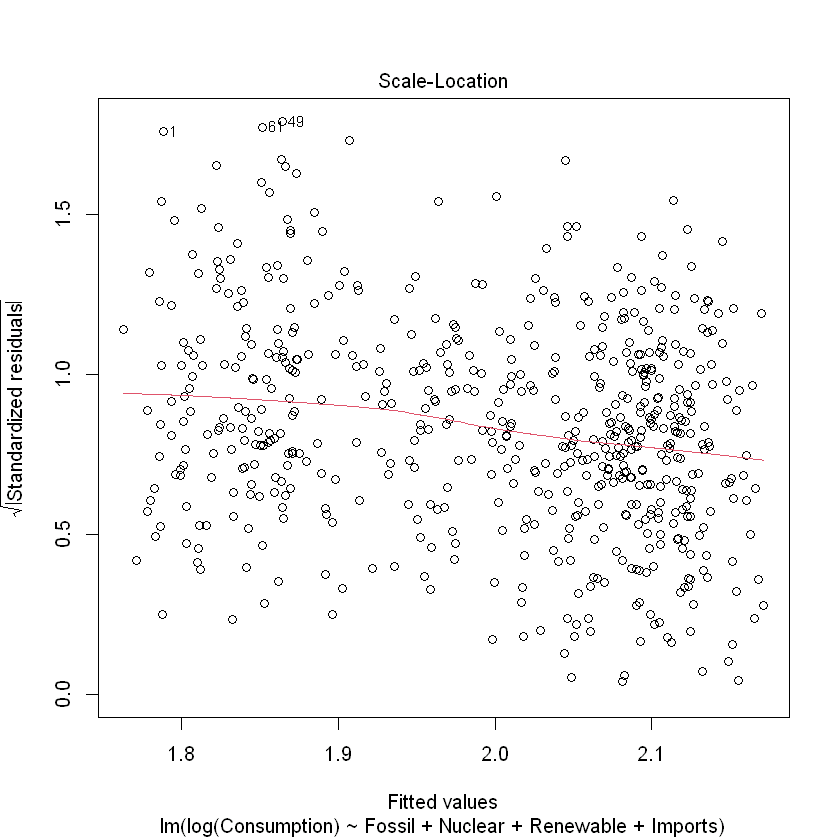

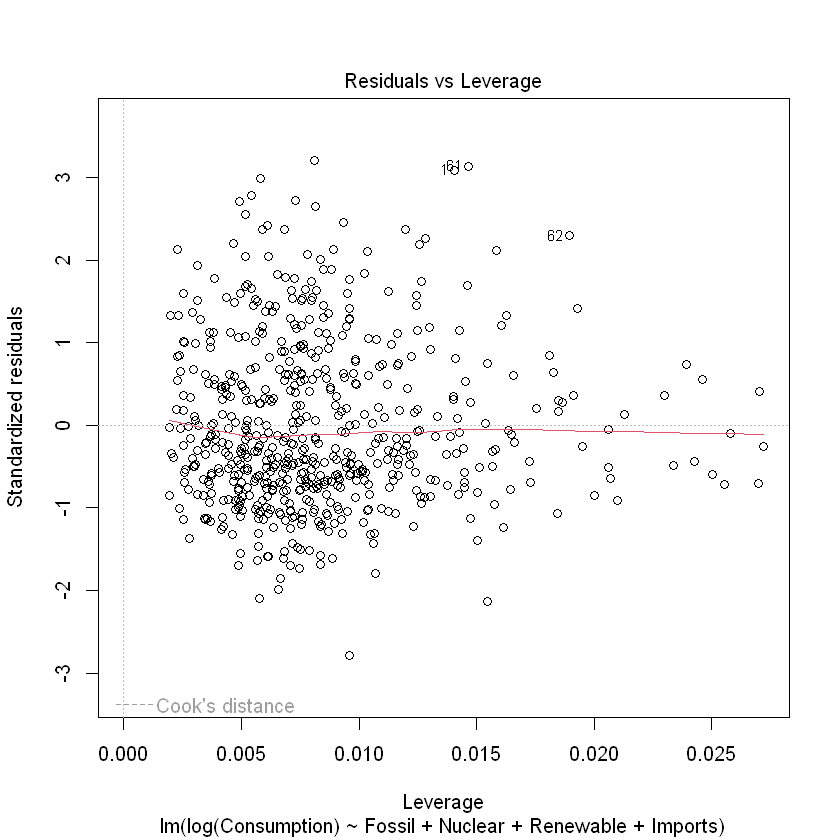

In [19]:
##log transformation 
ylog.mod = lm(log(Consumption)~Fossil+Nuclear+Renewable+Imports, 
              data = predictor.response.data)
summary(ylog.mod)
plot(ylog.mod)


Call:
lm(formula = Consumption ~ Fossil + Nuclear + Renewable + Imports, 
    data = predictor.response.data, weights = wts1)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.5097 -0.9088 -0.3067  0.7528  3.7723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.57022    0.23469  15.213  < 2e-16 ***
Fossil       0.34042    0.05800   5.869 7.28e-09 ***
Nuclear      2.49919    0.20376  12.266  < 2e-16 ***
Renewable   -0.33024    0.21711  -1.521    0.129    
Imports      0.56324    0.06142   9.170  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.227 on 594 degrees of freedom
Multiple R-squared:  0.7723,	Adjusted R-squared:  0.7708 
F-statistic: 503.7 on 4 and 594 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),3.1093031,4.03113705
Fossil,0.2265111,0.45432884
Nuclear,2.0990202,2.89936141
Renewable,-0.7566409,0.09616429
Imports,0.4426106,0.68387710


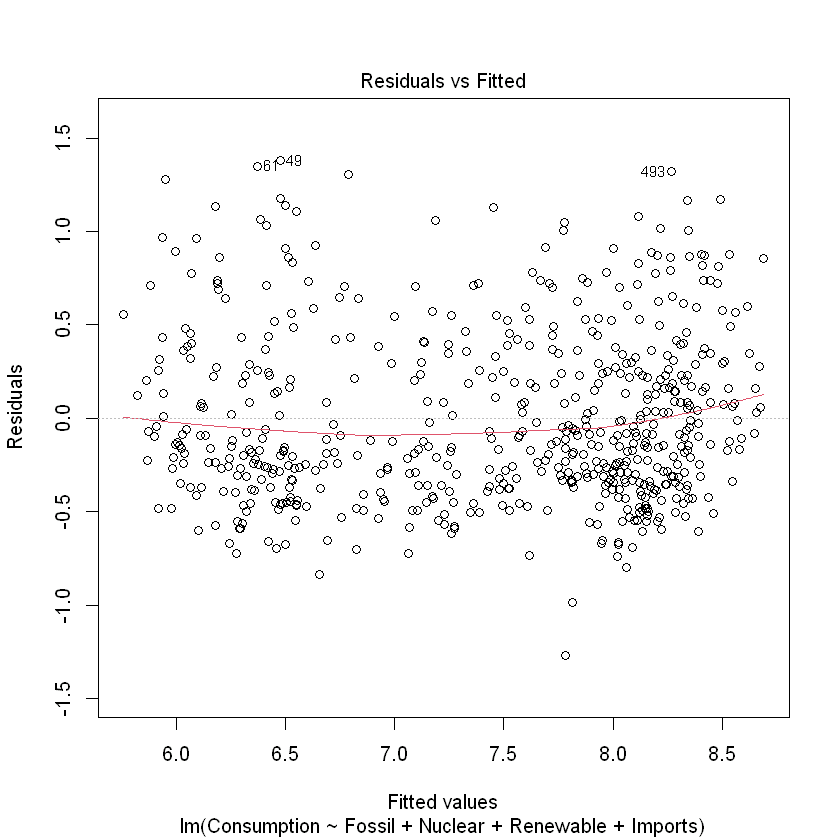

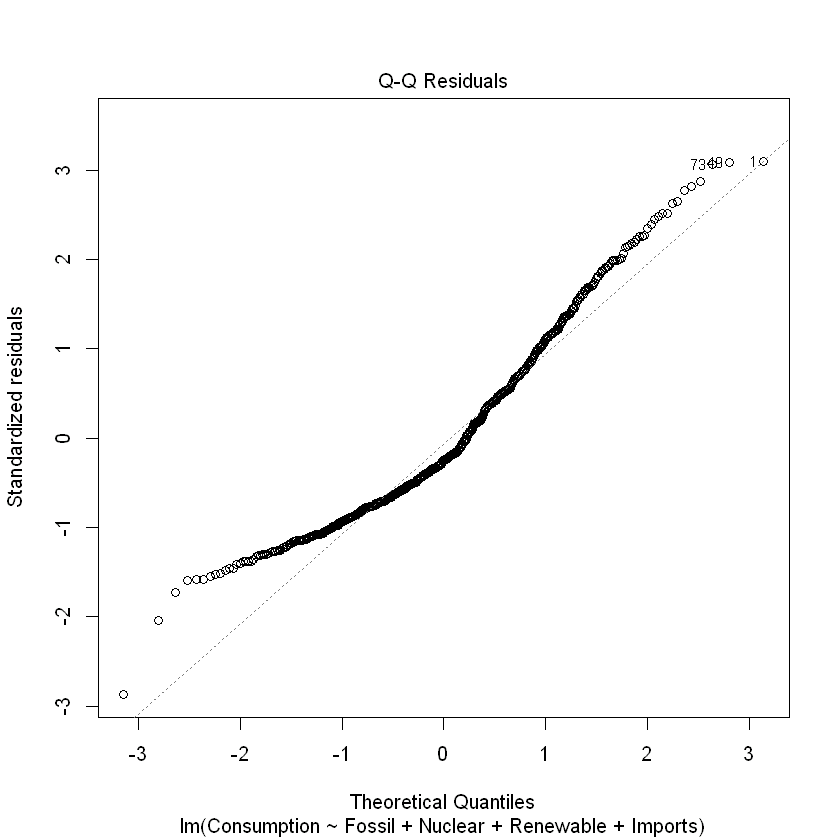

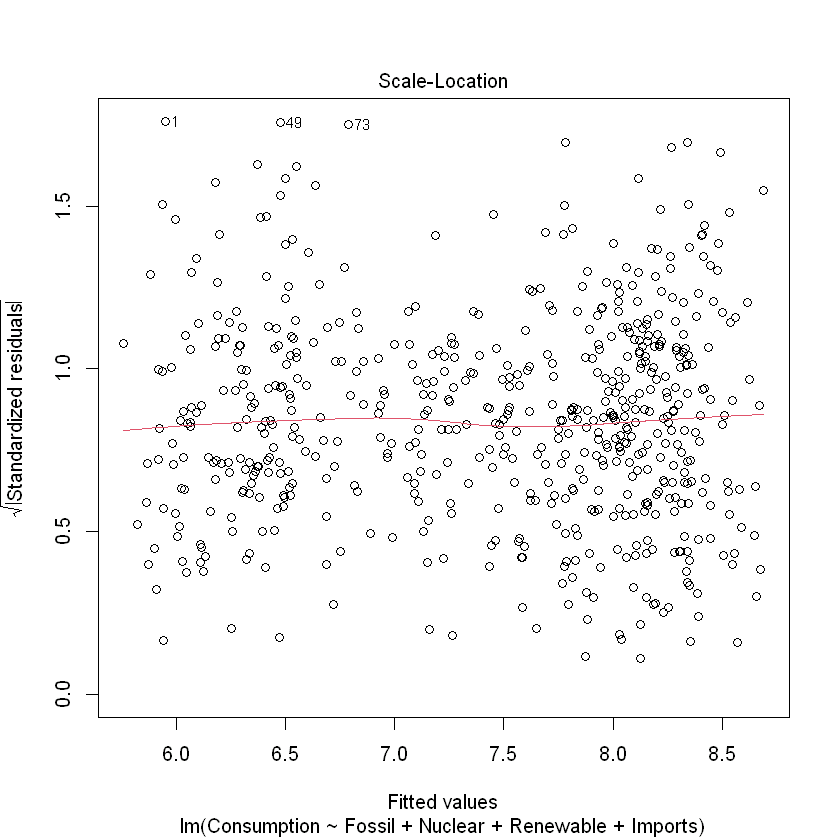


	studentized Breusch-Pagan test

data:  mlr.mod
BP = 6.444, df = 4, p-value = 0.1684



	studentized Breusch-Pagan test

data:  wls.mod
BP = 4279.9, df = 4, p-value < 2.2e-16


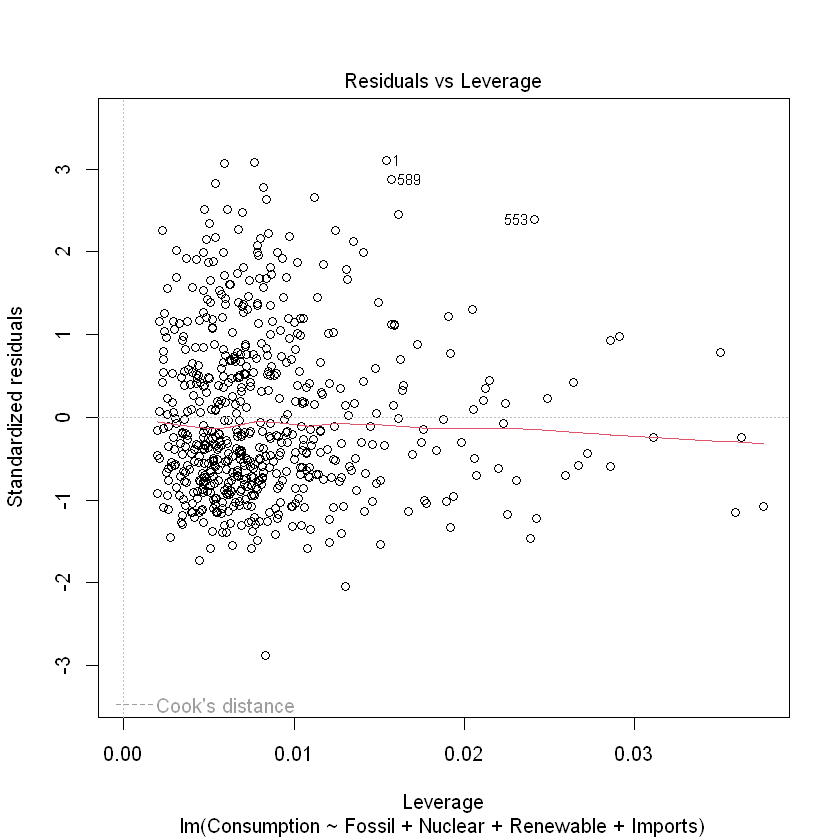

In [20]:
##WLS 
wts1 <- 1/fitted(lm(abs(residuals(mlr.mod)) ~ Fossil+Nuclear+Renewable+Imports,
                    predictor.response.data))^2
wls.mod = lm(Consumption ~ Fossil+Nuclear+Renewable+Imports, weight=wts1, 
             predictor.response.data)
summary(wls.mod)
confint(wls.mod)
plot(wls.mod)
bptest(mlr.mod)
bptest(wls.mod)

In [21]:
##Bootstrapping
set.seed(400)
mlr = function(predictor.response.data, indices) {
  mlr_boot_data = predictor.response.data[indices, ]
  mlr_fit = lm(Consumption~Fossil+Nuclear+Renewable+Imports, data= mlr_boot_data)
  coefficients(mlr_fit)
}
mlr_boot = boot(data= predictor.response.data, statistic = mlr, R=100)
mlr_boot
boot.ci(mlr_boot, index= 2, type = "perc")
boot.ci(mlr_boot, index= 3, type = "perc")
boot.ci(mlr_boot, index= 4, type = "perc")
boot.ci(mlr_boot, index= 5, type = "perc")


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = predictor.response.data, statistic = mlr, R = 100)


Bootstrap Statistics :
      original        bias    std. error
t1*  3.5769581 -0.0302193148  0.25560219
t2*  0.3264307  0.0026612171  0.06636371
t3*  2.4749311  0.0068893884  0.21696376
t4* -0.2567017 -0.0005224965  0.23803822
t5*  0.5805282  0.0052614264  0.05945063

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 100 bootstrap replicates

CALL : 
boot.ci(boot.out = mlr_boot, type = "perc", index = 2)

Intervals : 
Level     Percentile     
95%   ( 0.1918,  0.4846 )  
Calculations and Intervals on Original Scale
Some percentile intervals may be unstable

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 100 bootstrap replicates

CALL : 
boot.ci(boot.out = mlr_boot, type = "perc", index = 3)

Intervals : 
Level     Percentile     
95%   ( 2.049,  2.876 )  
Calculations and Intervals on Original Scale
Some percentile intervals may be unstable

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 100 bootstrap replicates

CALL : 
boot.ci(boot.out = mlr_boot, type = "perc", index = 4)

Intervals : 
Level     Percentile     
95%   (-0.7112,  0.2549 )  
Calculations and Intervals on Original Scale
Some percentile intervals may be unstable

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 100 bootstrap replicates

CALL : 
boot.ci(boot.out = mlr_boot, type = "perc", index = 5)

Intervals : 
Level     Percentile     
95%   ( 0.4610,  0.6972 )  
Calculations and Intervals on Original Scale
Some percentile intervals may be unstable

In [22]:
##Model selection with AIC 
aic = AIC(mlr.mod)
aic.wls = AIC(wls.mod)
aic.log = AIC(ylog.mod)
cat(aic)
cat(aic.wls)
cat(aic.log)

769.9795763.324-1631.885

Summary of iterative process:
1. First I did a log transformation on the response variable (Consumption)
2. Then I did a WLS model to see its effect on model performance and fit of data
3. Then I did a boostrap resampling method 
4. Finally I compared AIC scores to pick the model that best balences goodness of fit and complexity

Final Model Equation: 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \epsilon  


Where, 
Y= Total.Primary.Energy.Consumption → Y 
    B1= Total.Fossil.Fuel.Production → X1 
    B2= Nuclear.Electric.Power.Production → X2 
    B3= Total.Renewable.Energy.Production → X3
    B4= Primary.Energy.Imports → X4


I ended up going with the WLS model because the relationships between the predictor and response variables are preserved such as T-test p-values and direction and magnitude of coeffiecients. The weighted model also sligtly increased the R-squared value and AIC metrics show ΔAIC=6, so there is moderate evidence that the WLS model is better than the original using this method. In addition, the original structure of the model including the same response and predictor values was preserved so there is no substantial change to the model equation. 

From here, I will cross validate the WLS model using a k-fold method.

### Model Evaluation

### Validation Findings

In [23]:
#cross-cross validation of WLS with K-fold where K=10
#method 1
#Define the training control
train_control <- trainControl(method = "cv", number = 10)  # 10-fold CV
#Train the model
trained.model <- train(Consumption ~ Fossil+Nuclear+Renewable+Imports,
                       weights= wts1, 
                       predictor.response.data, 
                       method = "lm", trControl = train_control)
#Print the model summary
print(trained.model)
summary(trained.model)

Linear Regression 

599 samples
  4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 539, 539, 539, 539, 539, 539, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.4574256  0.7737439  0.3764039

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat, weights = wts)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.5097 -0.9088 -0.3067  0.7528  3.7723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.57022    0.23469  15.213  < 2e-16 ***
Fossil       0.34042    0.05800   5.869 7.28e-09 ***
Nuclear      2.49919    0.20376  12.266  < 2e-16 ***
Renewable   -0.33024    0.21711  -1.521    0.129    
Imports      0.56324    0.06142   9.170  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.227 on 594 degrees of freedom
Multiple R-squared:  0.7723,	Adjusted R-squared:  0.7708 
F-statistic: 503.7 on 4 and 594 DF,  p-value: < 2.2e-16


In [24]:
#Save datafram as CSV file
write.csv(predictor.response.data, "model_data.csv")